# Experimen Test Size 20 dengan Epoch 20

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.2, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ20_E20_2.h5")

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Epoch 1/20
125/125 [==============================] - 98s 775ms/step - loss: 0.6707 - accuracy: 0.5940 - val_loss: 0.6381 - val_accuracy: 0.6260
Epoch 2/20
125/125 [==============================] - 97s 776ms/step - loss: 0.6375 - accuracy: 0.6378 - val_loss: 0.6070 - val_accuracy: 0.6780
Epoch 3/20
125/125 [==============================] - 96s 772ms/step - loss: 0.6254 - accuracy: 0.6570 - val_loss: 0.6403 - val_accuracy: 0.6320
Epoch 4/20
125/125 [==============================] - 96s 772ms/step - loss: 0.6129 - accuracy: 0.6697 - val_loss: 0.6889 - val_accuracy: 0.6280
Epoch 5/20
125/125 [==============================] - 97s 777ms/step - loss: 0.5981 - accuracy: 0.6900 - val_loss: 0.5709 - val_accuracy: 0.6970
Epoch 6/20
125/125 [==============================] - 97s 774ms/step - loss: 0.5848 - accuracy: 0.6908 - val_loss: 0.5729 - val_accuracy: 0.7360
Epoch 7/

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 98s 620ms/step - loss: 0.5116 - accuracy: 0.7292
Validation Loss: 0.5115509033203125
Validation Accuracy: 0.729200005531311


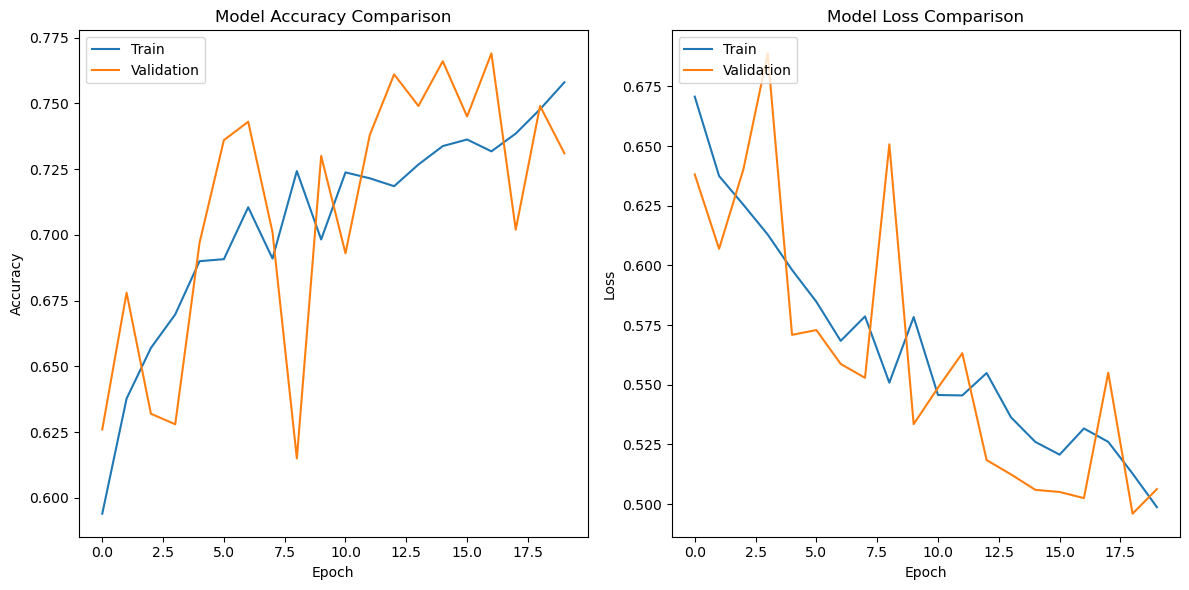

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E20_2.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 302ms/step


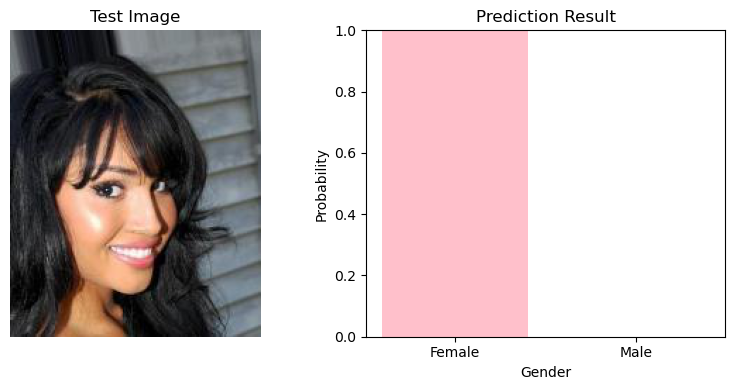

Model predicts: Female


In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E20_2.h5")

# Load the image you want to test
img_path = 'Images/001248.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")

# Optimizer dengan Learning Rate dan Optimizer Adam

ResNet50 Learning Rate 0.001 dan Optimizer Adam, Test Size = 0.2, Epoch = 30

In [42]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.2, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=[reduce_lr, early_stop]
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ20_E30_optimized.h5")

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


Epoch 1/30
125/125 [==============================] - 99s 785ms/step - loss: 0.6656 - accuracy: 0.6133 - val_loss: 0.6453 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 2/30
125/125 [==============================] - 96s 772ms/step - loss: 0.6407 - accuracy: 0.6378 - val_loss: 0.6233 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 3/30
125/125 [==============================] - 102s 820ms/step - loss: 0.6173 - accuracy: 0.6672 - val_loss: 0.5879 - val_accuracy: 0.6990 - lr: 0.0010
Epoch 4/30
125/125 [==============================] - 104s 833ms/step - loss: 0.5999 - accuracy: 0.6808 - val_loss: 0.6125 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 5/30
125/125 [==============================] - 104s 833ms/step - loss: 0.5917 - accuracy: 0.6870 - val_loss: 0.5673 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 6/30
125/125 [==============================] - 102s 821ms/step - loss: 0.5808 - accuracy: 0.6955 - val_loss: 0.5781 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 7/30
125/125 [============================

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 100s 634ms/step - loss: 0.4808 - accuracy: 0.7752
Validation Loss: 0.48083680868148804
Validation Accuracy: 0.7752000093460083


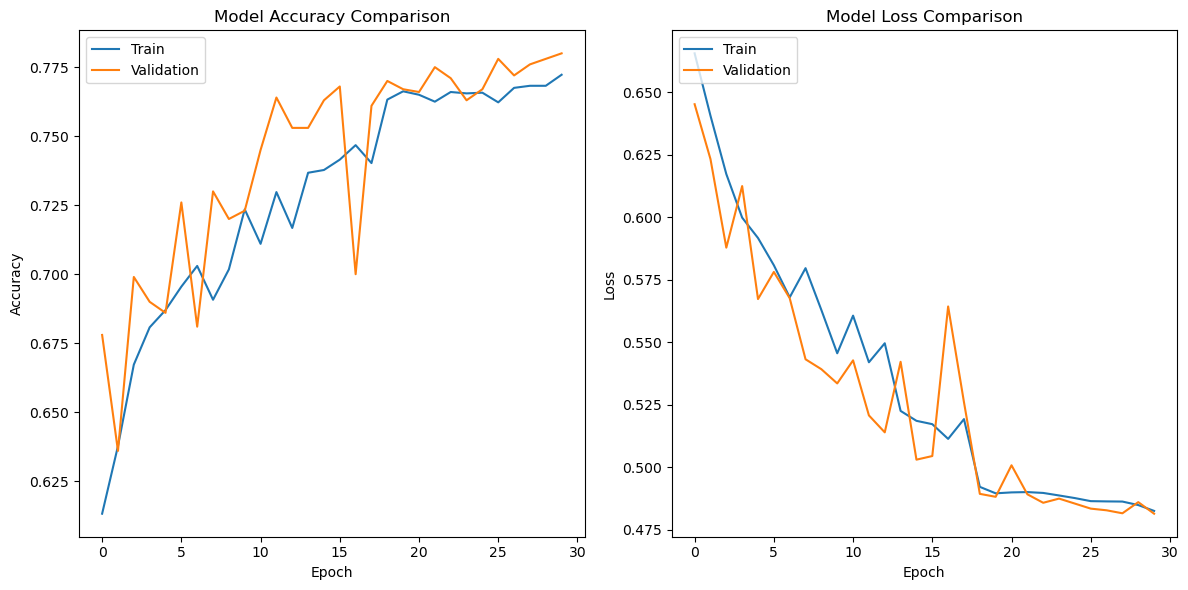

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E30_optimized.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 293ms/step


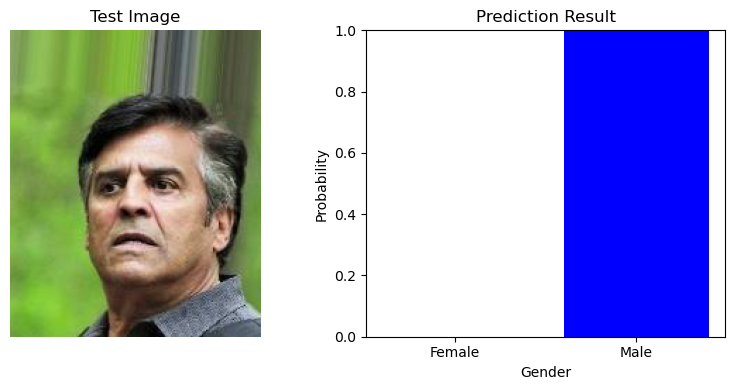

Model predicts: Male


In [56]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E30_optimized.h5")

# Load the image you want to test
img_path = 'Images/004599.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")

ResNet50 Learning Rate 0.001 dan Optimizer Adam, Test Size = 0.1, Epoch = 50

In [63]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.1, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[reduce_lr, early_stop]
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ10_E50_optimized.h5")

Found 4500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


Epoch 1/50
141/141 [==============================] - 99s 698ms/step - loss: 0.6771 - accuracy: 0.5927 - val_loss: 0.6324 - val_accuracy: 0.6320 - lr: 0.0010
Epoch 2/50
141/141 [==============================] - 95s 676ms/step - loss: 0.6361 - accuracy: 0.6476 - val_loss: 0.6168 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 3/50
141/141 [==============================] - 95s 677ms/step - loss: 0.6140 - accuracy: 0.6747 - val_loss: 0.6395 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 4/50
141/141 [==============================] - 95s 677ms/step - loss: 0.6065 - accuracy: 0.6718 - val_loss: 0.5836 - val_accuracy: 0.6600 - lr: 0.0010
Epoch 5/50
141/141 [==============================] - 95s 677ms/step - loss: 0.5901 - accuracy: 0.6864 - val_loss: 0.5756 - val_accuracy: 0.7360 - lr: 0.0010
Epoch 6/50
141/141 [==============================] - 95s 677ms/step - loss: 0.5749 - accuracy: 0.6993 - val_loss: 0.5855 - val_accuracy: 0.7320 - lr: 0.0010
Epoch 7/50
141/141 [==============================] 

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 98s 622ms/step - loss: 0.4273 - accuracy: 0.8064
Validation Loss: 0.4272907078266144
Validation Accuracy: 0.8064000010490417


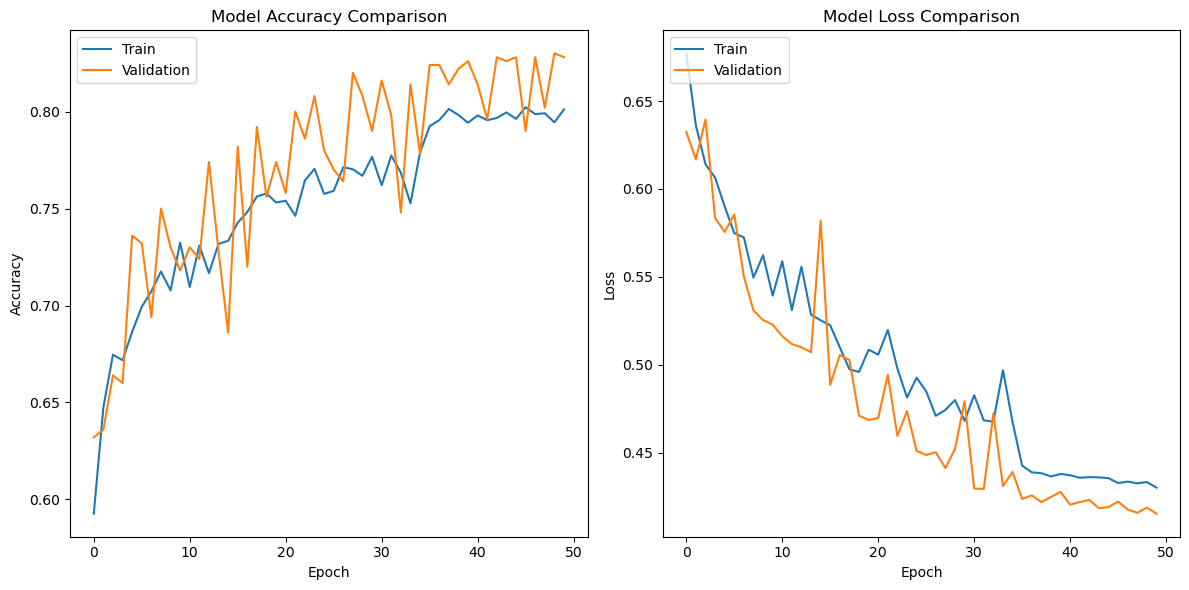

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E50_optimized.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

Found 500 validated image filenames belonging to 2 classes.
16/16 [==============================] - 10s 612ms/step
Accuracy: 0.8280
Precision: 0.7854
Recall: 0.7931
F1 Score: 0.7892
ROC AUC: 0.8944


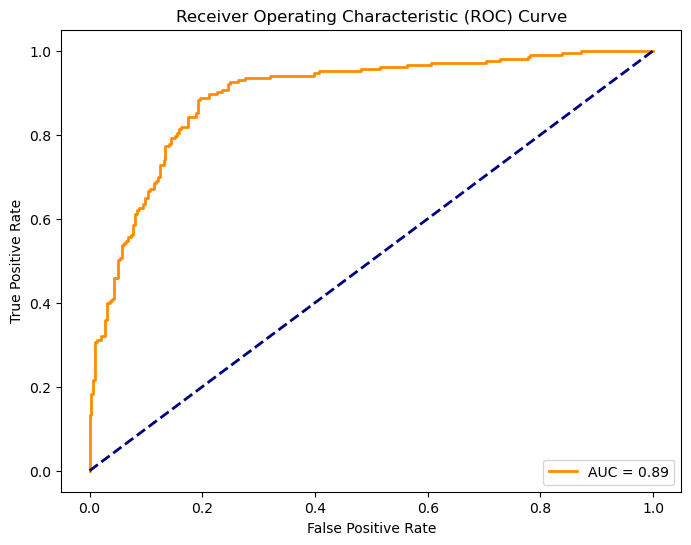

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

# Set up generator for validation data
valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',  # Sesuaikan dengan klasifikasi biner
    target_size=(224, 224)
)


# Evaluasi model pada data validasi
valid_generator.reset()  # Reset generator untuk memastikan dimulai dari awal

# Predict probabilities
y_pred_probs = model.predict(valid_generator, steps=len(valid_generator), verbose=1)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Ambil jumlah sampel yang sesuai dengan metrik evaluasi
num_samples = len(valid_generator.classes)

# Ambil sampel yang sesuai dengan jumlah sampel yang diharapkan oleh metrik evaluasi
y_true = valid_generator.classes[:num_samples]

# Metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 304ms/step


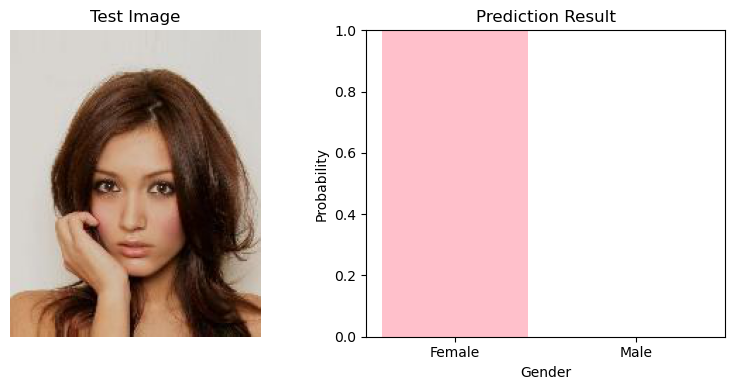

Model predicts: Female


In [77]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E50_optimized.h5")

# Load the image you want to test
img_path = 'Images/006107.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")

Menggunakan optimizer Adam dengan learning rate sebesar 0.001. Selain itu, juga menerapkan ReduceLROnPlateau dan EarlyStopping callbacks untuk mengoptimalkan learning rate secara adaptif dan menghentikan pelatihan jika tidak ada peningkatan yang signifikan dalam metrik validasi.

**ResNet50 Learning Rate 0.001 dan Optimizer Adam, Test Size = 0.1, Epoch = 100, Data Augmentation**

In [88]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.1, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=valid_generator
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ10_E100_optimized2.h5")

Found 4500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


Epoch 1/100
141/141 [==============================] - 96s 676ms/step - loss: 0.6711 - accuracy: 0.6042 - val_loss: 0.6586 - val_accuracy: 0.6620
Epoch 2/100
141/141 [==============================] - 95s 673ms/step - loss: 0.6275 - accuracy: 0.6580 - val_loss: 0.6142 - val_accuracy: 0.6420
Epoch 3/100
141/141 [==============================] - 95s 673ms/step - loss: 0.6133 - accuracy: 0.6744 - val_loss: 0.5870 - val_accuracy: 0.6660
Epoch 4/100
141/141 [==============================] - 95s 673ms/step - loss: 0.5904 - accuracy: 0.6956 - val_loss: 0.6177 - val_accuracy: 0.6900
Epoch 5/100
141/141 [==============================] - 95s 673ms/step - loss: 0.5784 - accuracy: 0.7071 - val_loss: 0.6917 - val_accuracy: 0.6400
Epoch 6/100
141/141 [==============================] - 95s 674ms/step - loss: 0.5757 - accuracy: 0.6982 - val_loss: 0.5412 - val_accuracy: 0.7180
Epoch 7/100
141/141 [==============================] - 95s 674ms/step - loss: 0.5728 - accuracy: 0.7011 - val_loss: 0.5355 -

Epoch 57/100
141/141 [==============================] - 95s 676ms/step - loss: 0.4679 - accuracy: 0.7773 - val_loss: 0.3944 - val_accuracy: 0.8480
Epoch 58/100
141/141 [==============================] - 96s 679ms/step - loss: 0.4357 - accuracy: 0.7936 - val_loss: 0.4312 - val_accuracy: 0.7680
Epoch 59/100
141/141 [==============================] - 98s 693ms/step - loss: 0.4232 - accuracy: 0.8024 - val_loss: 0.3875 - val_accuracy: 0.8160
Epoch 60/100
141/141 [==============================] - 95s 676ms/step - loss: 0.4114 - accuracy: 0.8122 - val_loss: 0.3927 - val_accuracy: 0.8520
Epoch 61/100
141/141 [==============================] - 95s 673ms/step - loss: 0.4098 - accuracy: 0.8167 - val_loss: 0.4303 - val_accuracy: 0.7620
Epoch 62/100
141/141 [==============================] - 95s 674ms/step - loss: 0.4218 - accuracy: 0.8062 - val_loss: 0.3977 - val_accuracy: 0.8000
Epoch 63/100
141/141 [==============================] - 95s 674ms/step - loss: 0.4391 - accuracy: 0.7962 - val_loss: 0

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 100s 636ms/step - loss: 0.3702 - accuracy: 0.8460
Validation Loss: 0.37022867798805237
Validation Accuracy: 0.8460000157356262


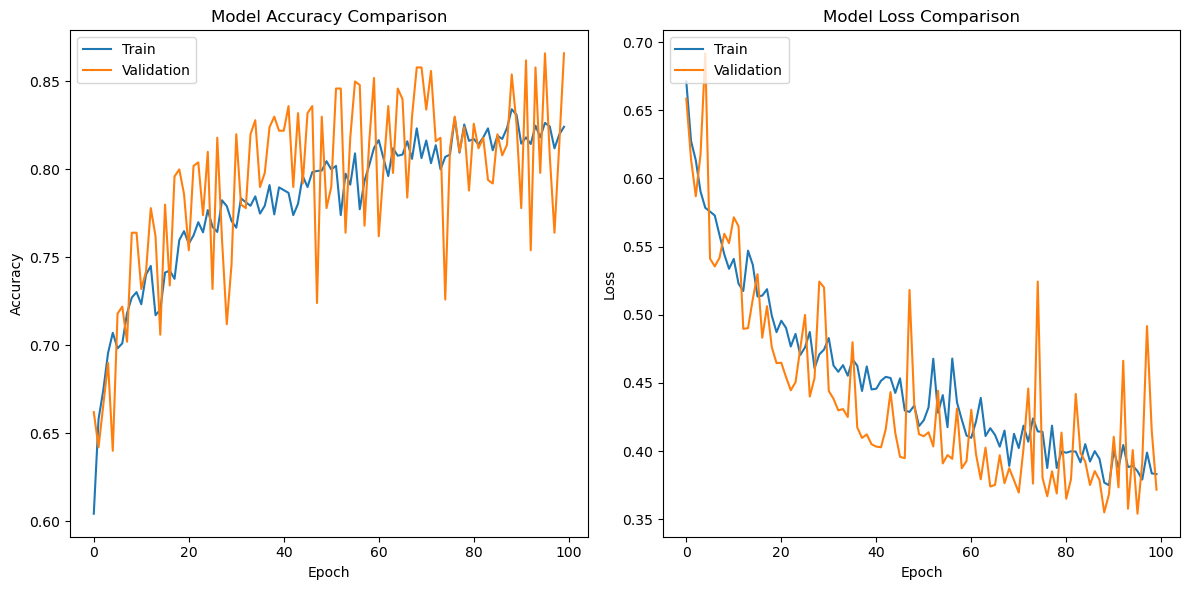

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E100_optimized2.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

Found 500 validated image filenames belonging to 2 classes.
16/16 [==============================] - 10s 602ms/step
Accuracy: 0.8660
Precision: 0.7931
Recall: 0.9064
F1 Score: 0.8460
ROC AUC: 0.9221


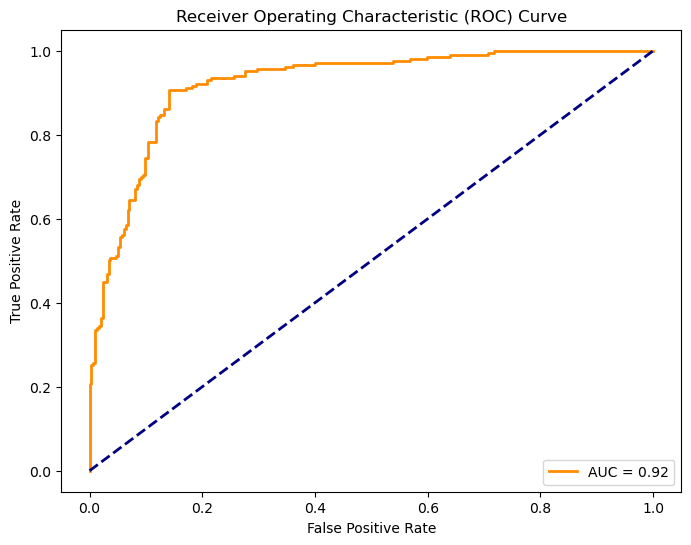

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

# Set up generator for validation data
valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',  # Sesuaikan dengan klasifikasi biner
    target_size=(224, 224)
)


# Evaluasi model pada data validasi
valid_generator.reset()  # Reset generator untuk memastikan dimulai dari awal

# Predict probabilities
y_pred_probs = model.predict(valid_generator, steps=len(valid_generator), verbose=1)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Ambil jumlah sampel yang sesuai dengan metrik evaluasi
num_samples = len(valid_generator.classes)

# Ambil sampel yang sesuai dengan jumlah sampel yang diharapkan oleh metrik evaluasi
y_true = valid_generator.classes[:num_samples]

# Metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 332ms/step


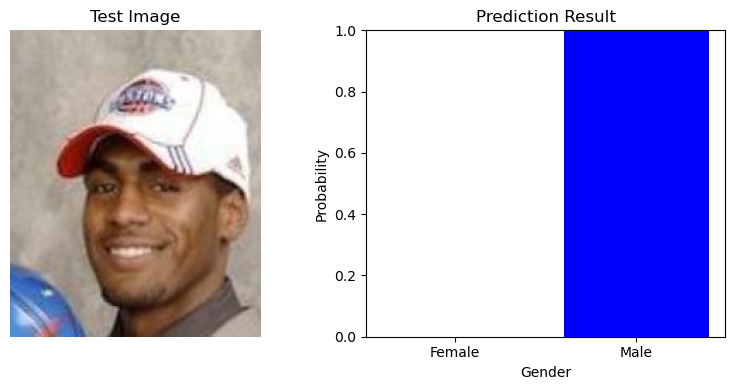

Model predicts: Male


In [92]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E100_optimized2.h5")

# Load the image you want to test
img_path = 'Images/005390.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")

**ResNet50 Learning Rate 0.001 dan Optimizer Adam, Test Size = 0.1, Epoch = 200, Data Augmentation, Learning Rate Scheduling:**

In [94]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.1, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=valid_generator
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ10_E200_optimized2.h5")

Found 4500 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


Epoch 1/200
141/141 [==============================] - 96s 674ms/step - loss: 0.6693 - accuracy: 0.6016 - val_loss: 0.6316 - val_accuracy: 0.6380
Epoch 2/200
141/141 [==============================] - 95s 676ms/step - loss: 0.6338 - accuracy: 0.6482 - val_loss: 0.6427 - val_accuracy: 0.6260
Epoch 3/200
141/141 [==============================] - 95s 675ms/step - loss: 0.6154 - accuracy: 0.6676 - val_loss: 0.5942 - val_accuracy: 0.7060
Epoch 4/200
141/141 [==============================] - 95s 675ms/step - loss: 0.6040 - accuracy: 0.6767 - val_loss: 0.5762 - val_accuracy: 0.6700
Epoch 5/200
141/141 [==============================] - 98s 694ms/step - loss: 0.5777 - accuracy: 0.6978 - val_loss: 0.5900 - val_accuracy: 0.7280
Epoch 6/200
141/141 [==============================] - 96s 681ms/step - loss: 0.5695 - accuracy: 0.7076 - val_loss: 0.5484 - val_accuracy: 0.7140
Epoch 7/200
141/141 [==============================] - 95s 676ms/step - loss: 0.5905 - accuracy: 0.6802 - val_loss: 0.6022 -

Epoch 57/200
141/141 [==============================] - 96s 679ms/step - loss: 0.4427 - accuracy: 0.7911 - val_loss: 0.4788 - val_accuracy: 0.7860
Epoch 58/200
141/141 [==============================] - 96s 678ms/step - loss: 0.4311 - accuracy: 0.8009 - val_loss: 0.4070 - val_accuracy: 0.7880
Epoch 59/200
141/141 [==============================] - 96s 678ms/step - loss: 0.4360 - accuracy: 0.7951 - val_loss: 0.4020 - val_accuracy: 0.8060
Epoch 60/200
141/141 [==============================] - 96s 678ms/step - loss: 0.4286 - accuracy: 0.8053 - val_loss: 0.3944 - val_accuracy: 0.8220
Epoch 61/200
141/141 [==============================] - 96s 678ms/step - loss: 0.4190 - accuracy: 0.8080 - val_loss: 0.3943 - val_accuracy: 0.8200
Epoch 62/200
141/141 [==============================] - 96s 678ms/step - loss: 0.4155 - accuracy: 0.8067 - val_loss: 0.4389 - val_accuracy: 0.7660
Epoch 63/200
141/141 [==============================] - 96s 679ms/step - loss: 0.4254 - accuracy: 0.8000 - val_loss: 0

141/141 [==============================] - 95s 675ms/step - loss: 0.3873 - accuracy: 0.8289 - val_loss: 0.3923 - val_accuracy: 0.8000
Epoch 113/200
141/141 [==============================] - 95s 675ms/step - loss: 0.3870 - accuracy: 0.8276 - val_loss: 0.3579 - val_accuracy: 0.8700
Epoch 114/200
141/141 [==============================] - 95s 676ms/step - loss: 0.4173 - accuracy: 0.8069 - val_loss: 0.3596 - val_accuracy: 0.8300
Epoch 115/200
141/141 [==============================] - 95s 673ms/step - loss: 0.3831 - accuracy: 0.8220 - val_loss: 0.3768 - val_accuracy: 0.8160
Epoch 116/200
141/141 [==============================] - 95s 675ms/step - loss: 0.3757 - accuracy: 0.8362 - val_loss: 0.3576 - val_accuracy: 0.8300
Epoch 117/200
141/141 [==============================] - 95s 674ms/step - loss: 0.3895 - accuracy: 0.8207 - val_loss: 0.3613 - val_accuracy: 0.8720
Epoch 118/200
141/141 [==============================] - 95s 675ms/step - loss: 0.3754 - accuracy: 0.8336 - val_loss: 0.3581 -

141/141 [==============================] - 95s 677ms/step - loss: 0.3568 - accuracy: 0.8400 - val_loss: 0.3708 - val_accuracy: 0.8640
Epoch 168/200
141/141 [==============================] - 95s 677ms/step - loss: 0.3626 - accuracy: 0.8424 - val_loss: 0.3462 - val_accuracy: 0.8620
Epoch 169/200
141/141 [==============================] - 96s 679ms/step - loss: 0.3543 - accuracy: 0.8453 - val_loss: 0.3602 - val_accuracy: 0.8580
Epoch 170/200
141/141 [==============================] - 96s 678ms/step - loss: 0.3455 - accuracy: 0.8484 - val_loss: 0.3980 - val_accuracy: 0.8280
Epoch 171/200
141/141 [==============================] - 95s 677ms/step - loss: 0.3882 - accuracy: 0.8216 - val_loss: 0.3527 - val_accuracy: 0.8360
Epoch 172/200
141/141 [==============================] - 96s 679ms/step - loss: 0.3809 - accuracy: 0.8236 - val_loss: 0.4261 - val_accuracy: 0.8180
Epoch 173/200
141/141 [==============================] - 96s 678ms/step - loss: 0.3691 - accuracy: 0.8358 - val_loss: 0.3433 -

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 94s 598ms/step - loss: 0.3634 - accuracy: 0.8244
Validation Loss: 0.36335015296936035
Validation Accuracy: 0.824400007724762


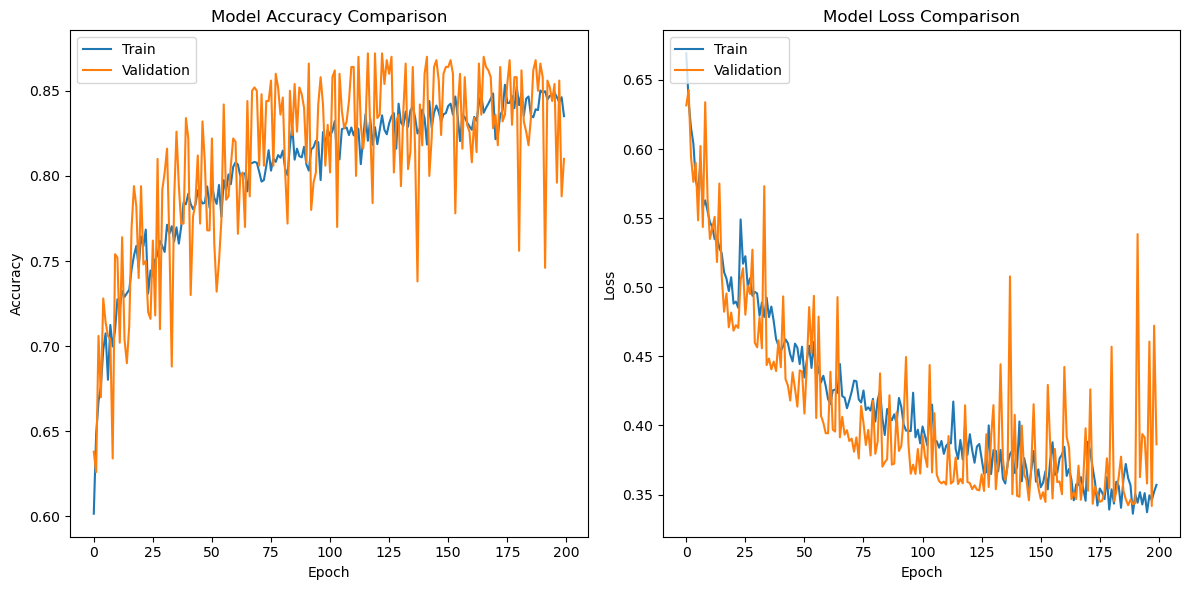

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E200_optimized2.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

Found 500 validated image filenames belonging to 2 classes.
16/16 [==============================] - 10s 593ms/step
Accuracy: 0.8100
Precision: 0.8600
Recall: 0.6355
F1 Score: 0.7309
ROC AUC: 0.9258


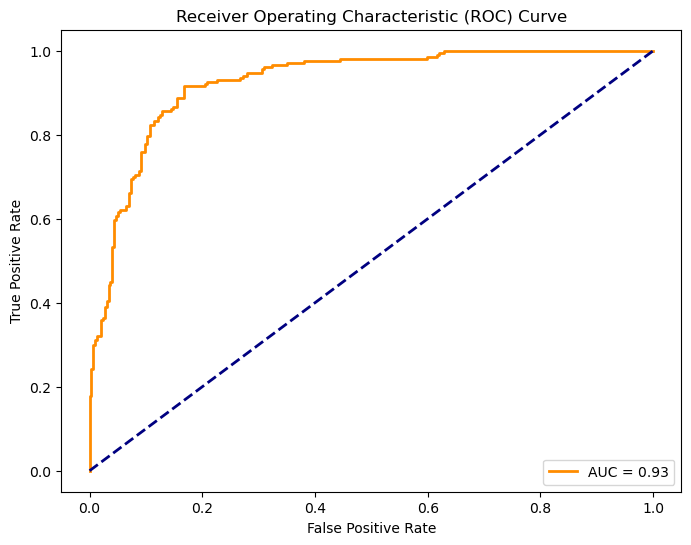

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

# Set up generator for validation data
valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',  # Sesuaikan dengan klasifikasi biner
    target_size=(224, 224)
)


# Evaluasi model pada data validasi
valid_generator.reset()  # Reset generator untuk memastikan dimulai dari awal

# Predict probabilities
y_pred_probs = model.predict(valid_generator, steps=len(valid_generator), verbose=1)

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Ambil jumlah sampel yang sesuai dengan metrik evaluasi
num_samples = len(valid_generator.classes)

# Ambil sampel yang sesuai dengan jumlah sampel yang diharapkan oleh metrik evaluasi
y_true = valid_generator.classes[:num_samples]

# Metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot kurva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 291ms/step


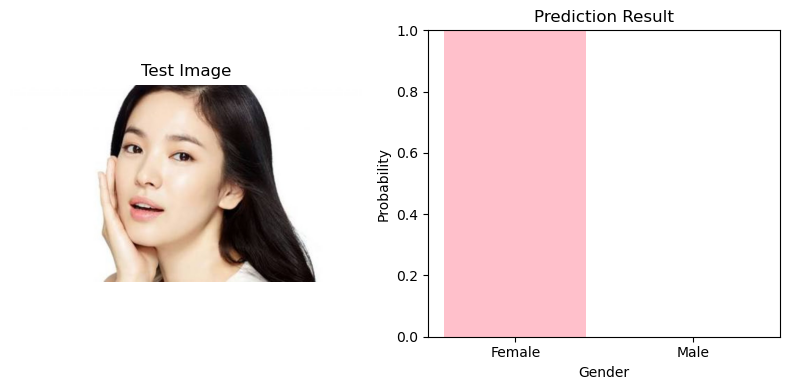

Model predicts: Female


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ10_E200_optimized2.h5")

# Load the image you want to test
img_path = 'images-8-1280x720.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")

## Implementasi dengan menggunakan optimizer SGD (Stochastic Gradient Descent) dan learning rate sebesar 0.01

In [57]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].astype(str)

# Split the data into training and validation sets
train_data, valid_data = train_test_split(celeba_data, test_size=0.2, random_state=42)

# Set up data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Load ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Set up optimizer with custom learning rate
optimizer = SGD(learning_rate=0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=[reduce_lr, early_stop]
)

# Save the trained model to an h5 file
model.save("E_ResNet50_TZ20_E30_optimized_SGD.h5")

Found 4000 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


Epoch 1/30
125/125 [==============================] - 108s 856ms/step - loss: 0.7086 - accuracy: 0.5487 - val_loss: 0.6712 - val_accuracy: 0.6070 - lr: 0.0100
Epoch 2/30
125/125 [==============================] - 100s 804ms/step - loss: 0.6868 - accuracy: 0.5698 - val_loss: 0.6725 - val_accuracy: 0.5960 - lr: 0.0100
Epoch 3/30
125/125 [==============================] - 98s 783ms/step - loss: 0.6786 - accuracy: 0.5847 - val_loss: 0.6802 - val_accuracy: 0.6360 - lr: 0.0100
Epoch 4/30
125/125 [==============================] - 97s 777ms/step - loss: 0.6715 - accuracy: 0.5935 - val_loss: 0.6624 - val_accuracy: 0.5970 - lr: 0.0100
Epoch 5/30
125/125 [==============================] - 97s 776ms/step - loss: 0.6736 - accuracy: 0.5800 - val_loss: 0.6556 - val_accuracy: 0.6010 - lr: 0.0100
Epoch 6/30
125/125 [==============================] - 97s 776ms/step - loss: 0.6698 - accuracy: 0.5978 - val_loss: 0.6525 - val_accuracy: 0.6110 - lr: 0.0100
Epoch 7/30
125/125 [==============================

/Users/lilakastara/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 5000 validated image filenames belonging to 2 classes.
157/157 [==============================] - 101s 640ms/step - loss: 0.6376 - accuracy: 0.6556
Validation Loss: 0.6376198530197144
Validation Accuracy: 0.6556000113487244


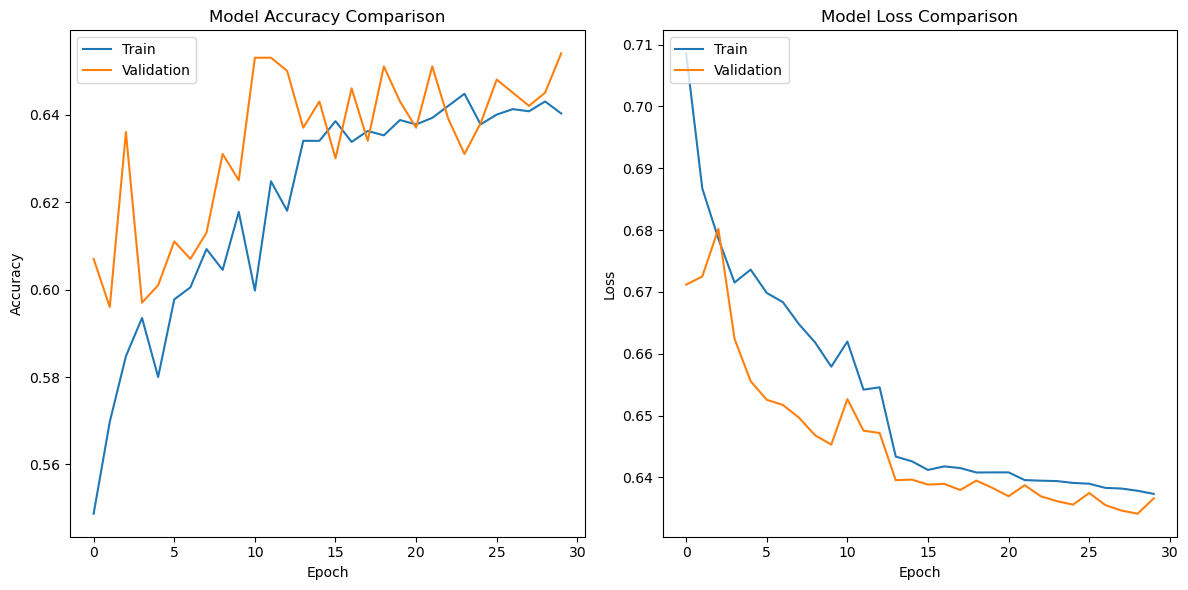

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E30_optimized_SGD.h5")

# Load CSV file with image_id and Male columns
celeba_data = pd.read_csv('clean_attribute_lila2.csv')
celeba_data['male'] = celeba_data['male'].replace(-1, 0).astype(str)

# Set up data generators for validation
datagen = ImageDataGenerator(rescale=1./255)

valid_generator = datagen.flow_from_dataframe(
    dataframe=celeba_data,
    directory='Images',
    x_col='file_name',
    y_col='male',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224)
)

# Evaluate the model on the validation set
evaluation = saved_model.evaluate(valid_generator)

# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Plot training history (if you have the history from training)
# Assuming you have a history variable like history = model.fit(...)
# Comment out this part if you don't have the history variable

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show plots
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 292ms/step


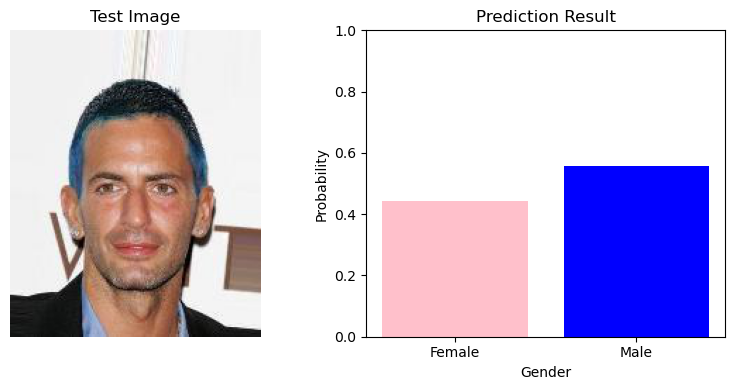

Model predicts: Male


In [61]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved ResNet50 model
saved_model = load_model("E_ResNet50_TZ20_E30_optimized_SGD.h5")

# Load the image you want to test
img_path = 'Images/004326.jpg'  # Ganti dengan path gambar yang ingin Anda uji
img = image.load_img(img_path, target_size=(224, 224))  # Sesuaikan dengan ukuran input ResNet50
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction using the saved model
prediction = saved_model.predict(img_array)

# Interpret the prediction result
if prediction[0][0] > 0.5:
    result = "Male"
else:
    result = "Female"

# Display the image and prediction result
plt.figure(figsize=(8, 4))

# Display the image
plt.subplot(1, 2, 1)
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

# Display the prediction result

plt.subplot(1, 2, 2)
plt.bar(['Female', 'Male'], [1 - prediction[0][0], prediction[0][0]], color=['pink', 'blue'])
plt.title('Prediction Result')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.ylim([0, 1])

# Show the plots
plt.tight_layout()
plt.show()

# Print the final result
print(f"Model predicts: {result}")